# 影像壓縮(Image Compression)

## 載入相關套件

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

## 載入測試圖片

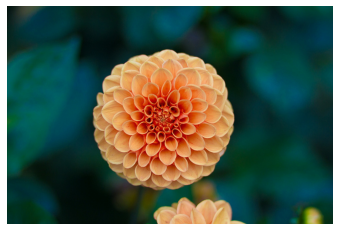

In [12]:
flower = load_sample_image('flower.jpg')
plt.axis('off')
plt.imshow(flower);

In [13]:
# 存檔
plt.imsave('./data/flower.jpg', flower)

## 正規化、取得圖片寬高及顏色維度、將寬高轉為一維

In [14]:
# 正規化
flower = np.array(flower, dtype=np.float64) / 255

# 取得圖片寬高及顏色維度
w, h, d = tuple(flower.shape)

# 將寬高轉為一維
image_array = np.reshape(flower, (w * h, d))
w, h, d

(427, 640, 3)

## 模型訓練及預測

In [15]:
# 隨機抽樣1000個像素
image_sample = shuffle(image_array, random_state=42)[:1000]

# K-Means模型訓練， 設定64個集群
kmeans = KMeans(n_clusters=64, random_state=42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 重建影像的函數

In [16]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            # 以質心取代原圖像顏色
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

## 比較原圖與減色後的圖片

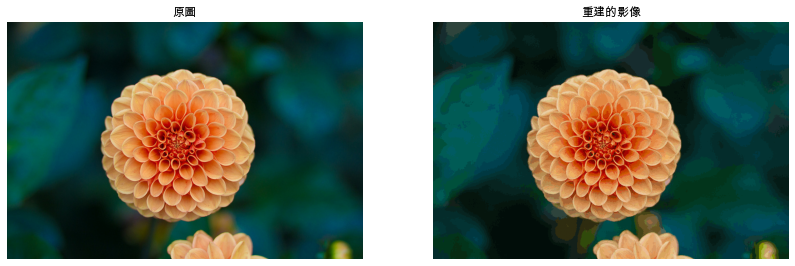

In [17]:
# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14,7))

# 原圖
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('原圖')
plt.imshow(flower)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('重建的影像')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

## 再使用K-Means，設定4個集群

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


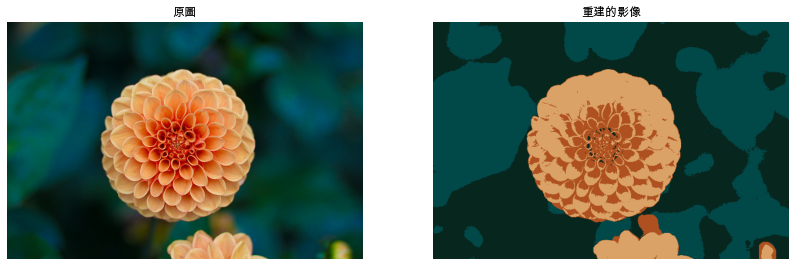

In [18]:
# K-Means模型訓練， 設定4個集群
kmeans = KMeans(n_clusters=4, random_state=42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

plt.figure(figsize=(14,7))
# 原圖
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('原圖')
plt.imshow(flower)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('重建的影像')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

In [22]:
# 存檔
plt.imsave('./data/flower_kmeans.jpg', reconstruct_image(kmeans.cluster_centers_, labels, w, h))